# <center> <h1> 🤖 👨‍💻 🧠

#### Batch-normalization is a method that helps to improve and stabilize the performance of artificial neural networks. The essence of this method is that some layers of the neural network receive data that is pre-processed and has zero mathematical expectation and unit variance.


#### Normalization of the input layer of a neural network is usually done by scaling the input to the activation functions. For example, if there are some features with values between 0 and 1 and between 1 and 1000, they should be normalized to speed up learning because there is a big difference between 1 and 1000.



First of all, let's remind you what a batch is. There are three possible approaches to implementing the gradient descent algorithm for training neural network models: stochastic and batch, mini-batch

* Stochastic gradient descent - in each iteration of the algorithm, only one object is selected from the training sample in some (random) way and the gradient is lowered (Stochastic Gradient Descent).

* Batch Gradient Descent - in each iteration, the training sample is completely considered, and only then the weights of the model are changed (Batch Gradient Descent).

* There is also a "golden mean" between stochastic gradient descent and batch gradient descent - only when looking at a training sample of a fixed size (batch size). In this case, such small batches are usually called mini-batch (MINI Batch Gradient Descent).

Now back to Batch-normalization 😁

Batch-normalization reduces the variation of node values in hidden layers (called covariance shift).

Covariate shift is a situation where the distribution of feature values in the training and test samples, that is, in the dataset, has different parameters (expectation, variance, etc.). In this case, the covariance refers to the feature values.

To explain this, let's focus on the following image

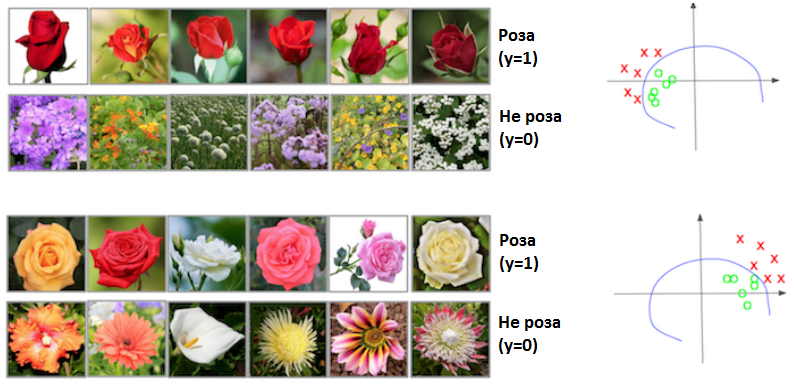


Let's have a deep neural network trained to detect the presence of a rose in an image. This neural network was trained only on images of red roses. Now, if we try to use a trained model to identify roses of different colors, it is obvious that the accuracy of the model will be low. This is because the training and test sets contain images of red roses and roses of different colors in different proportions.
In other words, if a model is trained to map from set x to set y, and the proportions of elements in x change, the model will need to be retrained to "even out" the proportions of elements in x and y ladi
If the batches contain images of different classes distributed in the same proportion throughout the batch, then the covariance shift is negligible. However, if batches are selected from only one or two subsets (in this case, red roses and roses of different colors), then the covariance drift increases. `This significantly slows down the process of training the model.`

A simple way to solve the covariance drift problem for the input layer is to randomly shuffle the data before generating the batches. But this method is not suitable for the hidden layers of the neural network, because the distribution of input data to each node of the hidden layers changes every time the parameters in the previous layer are updated. This problem is called internal covariate drift. To solve this problem, it is often necessary to use low learning rate and regularization methods to train the model. Another way to eliminate internal covariance is the Batch-normalization method.

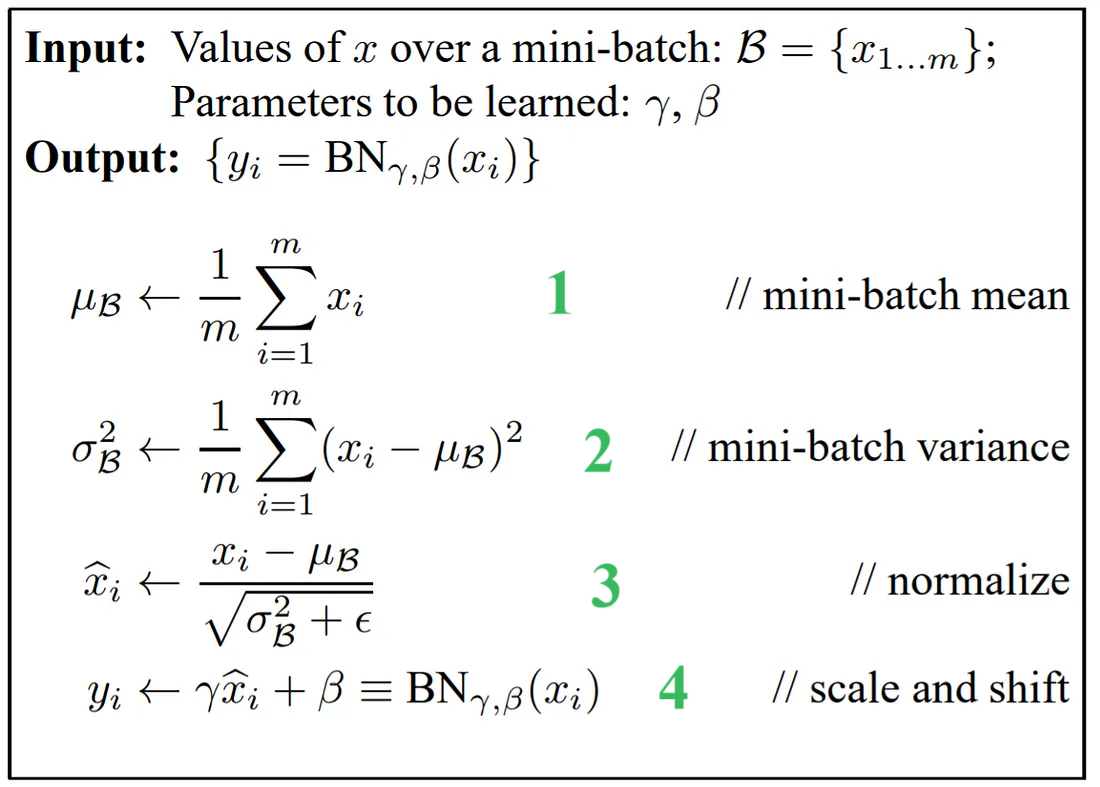

* Finds the average value of the 1st mini batch

* 2-We find the variance of the small party

* We standardize using Formula 3, subtract the average value from each input parameter (from each pixel of the image) (subtract the average value of the total pixels of the 1st image) and take the root of the standard deviation. As a result, it approaches zero. Batch-normalization works with exact formulas up to this point, that is, there are no learning parameters in 1-2-3.
* 4-Scale and shift is part of the learning part. Batch-normalization differs from standardization in that it has gamma and beta parameters. Gamma and beta update parameters at each epoch, i.e. they are also gradient-decreasing and then output to yi. Basically, after leaving 1 layer, the activation function is applied and then it has to enter the next layer, before entering this next layer, we apply Batch-normalization, which allows us to achieve the desired result earlier.


#### <center> `Now let's try using Batch-normalization in practice.`

In [1]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt


In [2]:
train_data_dir = "Datasets/birds/train"
test_data_dir = "Datasets/birds/test"

In [3]:
train_data = image_dataset_from_directory(train_data_dir, image_size=(224,224,))
test_data = image_dataset_from_directory(test_data_dir, image_size=(224,224))


Found 1582 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


In [9]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
list(train_data)

[(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
  array([[[[ 32.,  45.,  27.],
           [ 31.,  44.,  26.],
           [ 33.,  46.,  28.],
           ...,
           [ 19.,  36.,  17.],
           [ 22.,  39.,  20.],
           [ 23.,  40.,  21.]],
  
          [[ 29.,  42.,  24.],
           [ 29.,  42.,  24.],
           [ 32.,  45.,  27.],
           ...,
           [ 21.,  38.,  19.],
           [ 23.,  40.,  21.],
           [ 25.,  42.,  23.]],
  
          [[ 29.,  42.,  22.],
           [ 29.,  42.,  22.],
           [ 30.,  45.,  24.],
           ...,
           [ 22.,  39.,  20.],
           [ 24.,  41.,  22.],
           [ 25.,  42.,  23.]],
  
          ...,
  
          [[136., 189., 101.],
           [122., 175.,  83.],
           [114., 169.,  67.],
           ...,
           [128., 182.,  86.],
           [119., 172.,  82.],
           [112., 165.,  77.]],
  
          [[139., 188., 106.],
           [142., 192., 105.],
           [116., 170.,  74.],
    

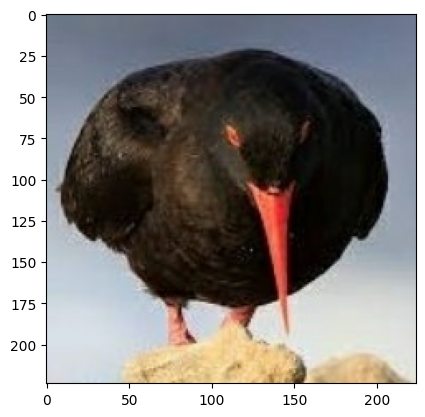

In [14]:
plt.imshow(list(train_data)[0][0][0].numpy().astype("uint8"))

In [15]:
classes = train_data.class_names
classes

['ABBOTTS BABBLER',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN COOT']

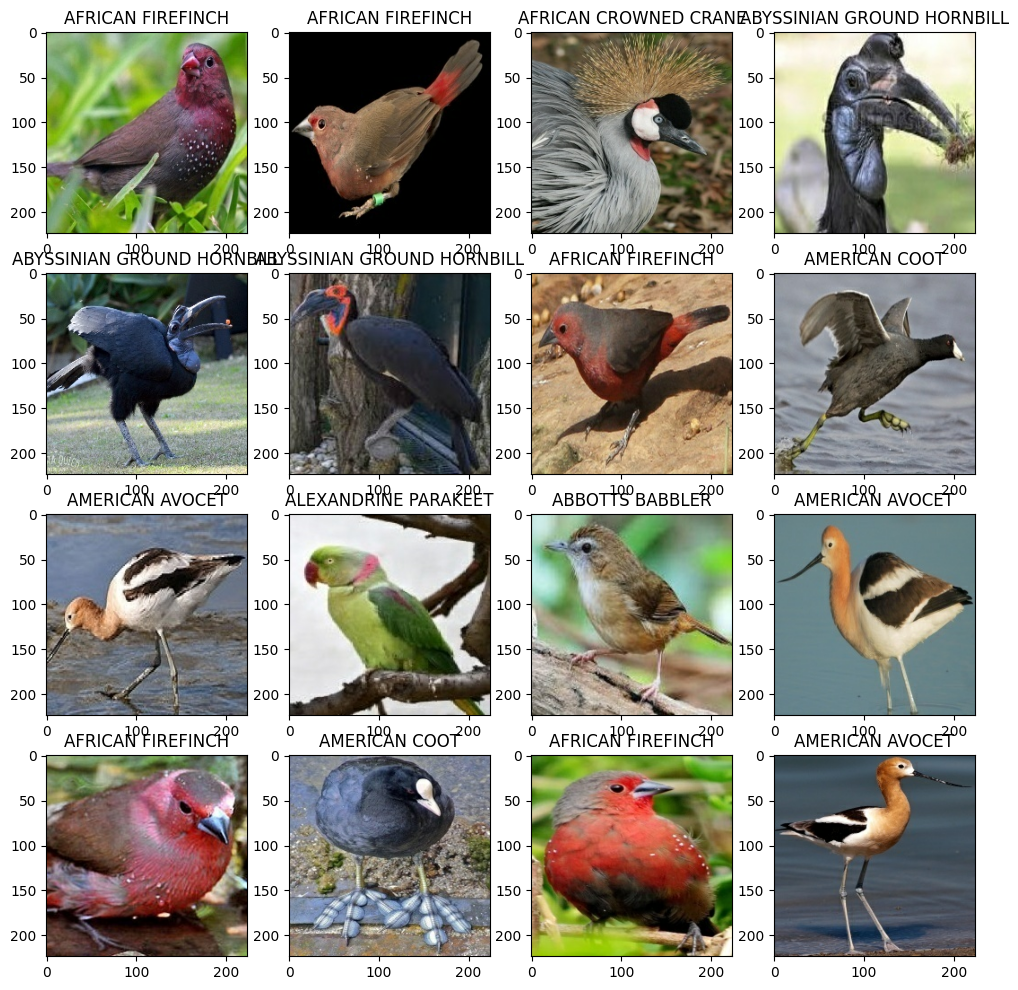

In [16]:
plt.figure(figsize=(12,12))
for image, label in train_data.take(1):
    
    for i in range(16):
        ax = plt.subplot(4,4,i+1)
        plt.title(classes[label[i]])
        plt.imshow(image[i].numpy().astype("uint8"))
    

# <center> Without Batch Normalization

In [4]:
model_without_batchnorm = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #112x112x16
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #56x56x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #28x28x64
    
    Flatten(),

    Dense(1000, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
    
])

In [5]:
model_without_batchnorm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [6]:
model_without_batchnorm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [7]:
model_without_batchnorm.fit(train_data, epochs=10)

Epoch 1/10
50/50 [==============================] - 19s 116ms/step - loss: 103.4712 - accuracy: 0.2832
Epoch 2/10
50/50 [==============================] - 5s 93ms/step - loss: 1.1970 - accuracy: 0.6378
Epoch 3/10
50/50 [==============================] - 5s 99ms/step - loss: 0.4351 - accuracy: 0.8755
Epoch 4/10
50/50 [==============================] - 5s 99ms/step - loss: 0.1303 - accuracy: 0.9678
Epoch 5/10
50/50 [==============================] - 5s 100ms/step - loss: 0.2412 - accuracy: 0.9374
Epoch 6/10
50/50 [==============================] - 18s 357ms/step - loss: 0.1318 - accuracy: 0.9602
Epoch 7/10
50/50 [==============================] - 5s 100ms/step - loss: 0.0610 - accuracy: 0.9798
Epoch 8/10
50/50 [==============================] - 5s 100ms/step - loss: 0.0282 - accuracy: 0.9943
Epoch 9/10
50/50 [==============================] - 5s 99ms/step - loss: 0.0698 - accuracy: 0.9810
Epoch 10/10
50/50 [==============================] - 5s 99ms/step - loss: 0.0239 - accuracy: 0.9956


In [8]:
model_without_batchnorm.evaluate(test_data)

2/2 [==============================] - 1s 426ms/step - loss: 2.8214 - accuracy: 0.5800


[2.8213589191436768, 0.5799999833106995]

# <center>  With Batch Normalization

In [9]:
model_with_batchnorm = Sequential([
    InputLayer((224,224,3)),
    
    Conv2D(16, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #112x112x16
    
    Conv2D(32, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #56x56x32
    
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPool2D(2,2),  #28x28x64
    
    Flatten(),
    
    Dense(1000, activation="relu"),
    BatchNormalization(),
    Dense(100, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax")
    
])

In [10]:
model_with_batchnorm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [11]:
model_with_batchnorm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [12]:
model_with_batchnorm.fit(train_data, epochs=10)

Epoch 1/10
50/50 [==============================] - 8s 110ms/step - loss: 1.7728 - accuracy: 0.4033
Epoch 2/10
50/50 [==============================] - 19s 371ms/step - loss: 0.8450 - accuracy: 0.7314
Epoch 3/10
50/50 [==============================] - 15s 299ms/step - loss: 0.4268 - accuracy: 0.8774
Epoch 4/10
50/50 [==============================] - 15s 294ms/step - loss: 0.2026 - accuracy: 0.9450
Epoch 5/10
50/50 [==============================] - 15s 295ms/step - loss: 0.1074 - accuracy: 0.9779
Epoch 6/10
50/50 [==============================] - 15s 293ms/step - loss: 0.0700 - accuracy: 0.9861
Epoch 7/10
50/50 [==============================] - 15s 305ms/step - loss: 0.0399 - accuracy: 0.9949
Epoch 8/10
50/50 [==============================] - 16s 305ms/step - loss: 0.0385 - accuracy: 0.9962
Epoch 9/10
50/50 [==============================] - 15s 295ms/step - loss: 0.0184 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 15s 288ms/step - loss: 0.0107 - accurac

In [13]:
model_with_batchnorm.evaluate(test_data)

2/2 [==============================] - 1s 97ms/step - loss: 0.4282 - accuracy: 0.8600


[0.4282001852989197, 0.8600000143051147]

If we pay attention, `in our model without batch normalization, 99% accuracy is achieved in the 10th epoch during the training process`, `in our model with batch normalization, 99% accuracy is achieved in the 7th epoch.` This may not seem like much to you now, but it is very useful when working with very large datasets. The model without batch normalization achieved 57% accuracy when tested, and our model with batch normalization achieved 86% accuracy.

If we talk about the differences between them, the total number of train parameters in our model without batch normalization is `50,301,694`,
Our model with batch normalization has `50,306,094`, which is `4400` more than the model without batch normalization. As we mentioned above, Batch normalization has two learning parameters beta and gamma, both of which are gradient descent, so Batch normalization model has more parameters.

Another thing to notice is that the model without batch normalization takes an average of 5 seconds to train each epoch, while the model with batch normalization takes an average of 15 seconds, which is better than useless training in my opinion useful teaching preferred 🙂.


# <center> <h1> 👨‍💻   🚀  